In [7]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列

In [8]:
file_path = 'ibm_kyiv_1#.csv'
df = pd.read_csv(file_path)

# # df = df.drop(columns=['pbid'])
# df = df[df['depth'] >= 20]
# df = df[(df['num_params'] >= 1)]
grouped_df = df.groupby(['pksid','pkid','method'], as_index=False).mean()

# values = ["depth", "culled_depth"]
values = ["depth", 'num_params']
grouped_df

,pksid,pkid,method,pbid,layers,variables,constraints,best_solution_probs,in_constraints_probs,ARG,iteration_count,classcial,quantum,run_times
0,0,0,ChocoSolver,4.5,5.0,6.0,3.0,1.406250,6.054688,93.225350,71.0,4.169822,32013.627605,78.0
1,0,0,HeaSolver,4.5,5.0,6.0,3.0,1.484375,6.201172,91.749268,71.0,3.153895,28120.794262,78.0
2,0,0,PenaltySolver,4.5,5.0,6.0,3.0,1.484375,6.318359,88.407855,71.0,3.129584,28108.590931,78.0
3,0,0,QtoSimplifyDiscardSegmentedSolver,4.5,5.0,6.0,3.0,48.437803,100.000000,0.642743,30.3,6.408688,36833.598904,110.4
4,0,0,QtoSimplifyDiscardSolver,4.5,5.0,6.0,3.0,5.712891,20.185547,47.768915,15.3,0.936439,27438.191410,17.3
5,0,0,QtoSimplifySolver,4.5,5.0,6.0,3.0,1.630859,6.503906,91.637689,71.0,4.209521,32142.554931,78.0
6,0,0,QtoSolver,4.5,5.0,6.0,3.0,11.054688,15.693359,83.186339,71.0,4.309767,32670.462839,78.0


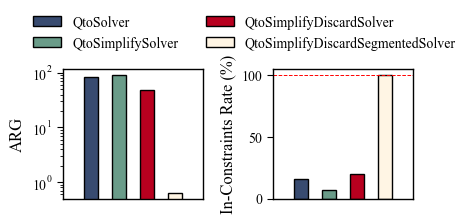

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

scale = 1
width = 3.5 * scale    
height = 3.5 * scale * 0.37

mpl.rcParams.update({
    'figure.figsize': (width, height),
    'pdf.fonttype': 42,  # 输出 PDF 文件时使用 TrueType 字体，确保兼容性
    'ps.fonttype': 42,  # 输出 PS 文件时使用 TrueType 字体，避免字体问题
    'font.family': 'Times New Roman',  # 全局字体设置为 Times New Roman，符合论文要求
    'font.size': 10,  # 正文字体大小，通常为 10pt，与论文模板一致
    'axes.unicode_minus': False,  # 确保负号正确显示，而不是用其他符号代替
    'mathtext.fontset': 'custom',  # 数学公式字体自定义
    'mathtext.rm': 'Times New Roman',  # 数学公式中普通字体使用 Times New Roman
    'mathtext.it': 'Times New Roman:italic',  # 数学公式中的斜体
    'mathtext.bf': 'Times New Roman:bold',  # 数学公式中的粗体
    'axes.linewidth': 1.0,  # 坐标轴线条宽度，设置为 1.0 保持清晰
    'xtick.major.size': 4,  # X 轴主刻度线的长度
    'xtick.major.width': 0.8,  # X 轴主刻度线的宽度
    'xtick.minor.size': 2,  # X 轴次刻度线的长度
    'xtick.minor.width': 0.6,  # X 轴次刻度线的宽度
    'ytick.major.size': 4,  # Y 轴主刻度线的长度
    'ytick.major.width': 0.8,  # Y 轴主刻度线的宽度
    'ytick.minor.size': 2,  # Y 轴次刻度线的长度
    'ytick.minor.width': 0.6,  # Y 轴次刻度线的宽度
    'lines.markersize': 6,  # 线条标记的大小
    'lines.markeredgewidth': 0.8,  # 标记边框的宽度
    'markers.fillstyle': 'full',  # 标记的填充样式，设置为实心
    'lines.markeredgecolor': 'black',  # 标记边框的颜色，设置为黑色
    'axes.labelsize': 12,  # 坐标轴标签的字体大小
    'axes.titlesize': 12,  # 坐标轴标题的字体大小
    'legend.fontsize': 10,  # 图例的字体大小
    'grid.color': 'gray',  # 网格线的颜色，设置为灰色
    'grid.linestyle': '--',  # 网格线的样式，设置为虚线
    'grid.linewidth': 0.5,  # 网格线的宽度
})

error_params = {
    'elinewidth': 0.7 * scale,
    'ecolor': 'black',
    'capsize': 1.9 * scale,
    'capthick': 0.5 * scale
}
bar_width = 0.2
colors = ['#384B70', '#6A9C89', '#B8001F', '#FFF5E4', '#FFF', '#FFF']
methods = ['QtoSolver', 'QtoSimplifySolver', 'QtoSimplifyDiscardSolver', 'QtoSimplifyDiscardSegmentedSolver']

# 绘制第一个图（ARG）
axes1 = plt.axes([0, 0, 0.4, 1])
for idx, method in enumerate(methods):
    data = grouped_df[grouped_df.method == method]
    x = np.arange(len(data.pkid))
    y = data['ARG']
    
    plt.bar(
        x + idx * bar_width - bar_width, y, 
        width=0.1, 
        color=colors[idx],
        edgecolor="black",
        error_kw=error_params, 
        label=method
    )
    
plt.ylabel('ARG')
plt.yscale('log')
plt.xlim(-0.4, 0.6)
plt.xticks([])


axes2 = plt.axes([0.6, 0, 0.4, 1])
for idx, method in enumerate(methods):
    data = grouped_df[grouped_df.method == method]
    x = np.arange(len(data.pkid))
    y = data['in_constraints_probs']
    
    plt.bar(
        x + idx * bar_width - bar_width, y, width=0.1, 
        color=colors[idx], 
        edgecolor="black", 
        error_kw=error_params, 
        label=method
    )
    
plt.ylabel('In-Constraints Rate (%)')
plt.ylim(0, 105)
plt.xlim(-0.4, 0.6)
plt.xticks([])
# plt.grid()
plt.plot([-0.4, 0.6], [100, 100], color='red', linestyle='--', linewidth=0.7 * scale)
plt.legend(loc='lower center', ncol=2, frameon=False, prop={'size': 10 * scale}, bbox_to_anchor=(-0.2, 1.05))
plt.savefig('draw.svg', bbox_inches='tight')

